In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import random
import cv2
import pickle

In [3]:
images = []
number_of_errors = 0
number_of_processed = 0

In [4]:
dir = "S:\Downloads\data sets\eardrumDs\eardrumDs"
for class_name in os.listdir(dir):
    path_to_class = dir + "\\" + class_name
    for image in os.listdir(path_to_class):
        
        
        try:
            path_to_image = f"{path_to_class}/{image}"

            img = cv2.imread(path_to_image, 0)
            img = cv2.resize(img, (128,128))
            img = img/255
            images.append([img, int(class_name)])
            number_of_processed += 1
        except:
            number_of_errors += 1
        print(f"\rProcessed: {number_of_processed} | Erros: {number_of_errors}", end="")

Processed: 955 | Erros: 0

In [5]:
for _ in range(27):
    random.shuffle(images)

In [6]:
X = []
y = []

for image, idx in images:
    X.append(image)
    y.append(idx)
print(len(X))
print(len(y))

955
955


In [7]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

In [8]:
X_train = X[:777]
y_train = y[:777]

X_test = X[777:]
y_test = y[777:]

In [9]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

777
777
178
178


In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [11]:
X_train = X_train.reshape(-1, 128, 128, 1) 
X_test = X_test.reshape(-1, 128, 128, 1) 

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(128,128,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(9, activation = 'softmax'))

In [13]:
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [14]:
# Compile the model
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test))

Epoch 1/40
25/25 [==============================] - 6s 240ms/step - loss: 1.8235 - accuracy: 0.4981 - val_loss: 1.4512 - val_accuracy: 0.5787
Epoch 2/40
25/25 [==============================] - 6s 229ms/step - loss: 1.5814 - accuracy: 0.5277 - val_loss: 1.4313 - val_accuracy: 0.5787
Epoch 3/40
25/25 [==============================] - 6s 226ms/step - loss: 1.5301 - accuracy: 0.5302 - val_loss: 1.4107 - val_accuracy: 0.5787
Epoch 4/40
25/25 [==============================] - 6s 228ms/step - loss: 1.5334 - accuracy: 0.5495 - val_loss: 1.4638 - val_accuracy: 0.5787
Epoch 5/40
25/25 [==============================] - 6s 228ms/step - loss: 1.5134 - accuracy: 0.5495 - val_loss: 1.3979 - val_accuracy: 0.5787
Epoch 6/40
25/25 [==============================] - 6s 226ms/step - loss: 1.4957 - accuracy: 0.5444 - val_loss: 1.3818 - val_accuracy: 0.5787
Epoch 7/40
25/25 [==============================] - 6s 227ms/step - loss: 1.4794 - accuracy: 0.5483 - val_loss: 1.3785 - val_accuracy: 0.5787
Epoch 

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 46ms/step - loss: 1.0496 - accuracy: 0.6910


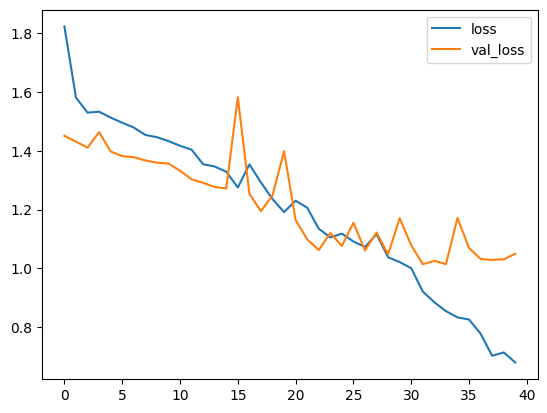

In [17]:
# Figure of the loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

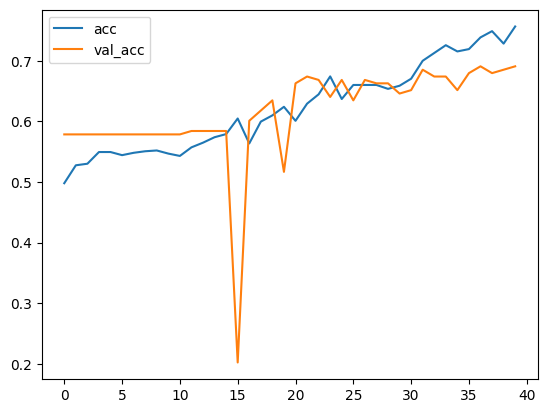

In [18]:
# Figure of the accuracy
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [19]:
# Predict the model
predictions = model.predict(X_test).argmax(axis=1)

6/6 [==============================] - 0s 45ms/step


Text(0.5, 1.0, 'Predicted: 5 | Actual: 5')

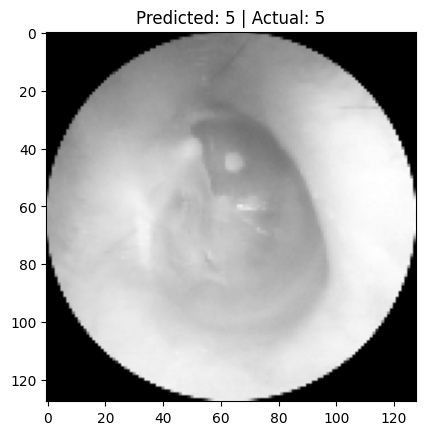

In [64]:
i = random.randint(0, len(X_test))
plt.imshow(X_test[i].reshape(128,128), cmap='gray')
plt.title(f"Predicted: {predictions[i]} | Actual: {y_test[i]}")

<AxesSubplot:>

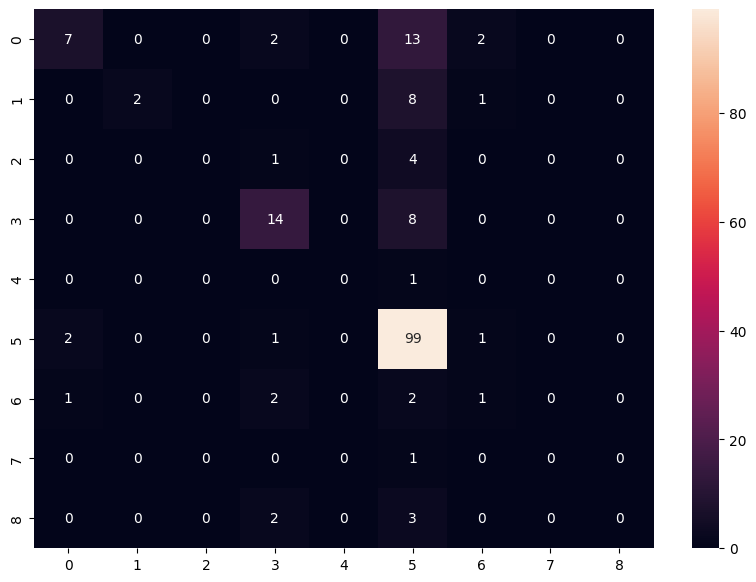

In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(cm, range(9), range(9))
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
